In [38]:
#imports
import pandas as pd
import requests
from bs4 import BeautifulSoup
from fuzzywuzzy import process


#url to get data
url = 'https://qz.com/1735700/apple-and-disney-are-creating-an-explosion-of-tv-series-budgets/'

#request and push to soup
res = requests.get(url)
soup = BeautifulSoup(res.text,'html.parser')
#find table
table = soup.find(name='table',attrs={'class':'c188c'})

df_table = pd.read_html(str(table))[0]

#add genre column with fuzzywuzzy
choices = ['Action','Adventure', 'Drama', 'Comedy', 'Thriller/Suspense',
       'Horror', 'Romantic Comedy', 'Musical', 'Documentary',
       'Black Comedy', 'Western', 'Concert/Performance',
       'Multiple Genres', 'Reality']
df_table['Genre']=''
#https://www.rottentomatoes.com/tv/the_morning_show/
drama_url = 'https://www.rottentomatoes.com/tv/'
j=0
for i in df_table['TV series']:
    formated_i = i.lower().replace(' ','_')
    full_url = drama_url+formated_i
    #print(full_url)
    res = requests.get(full_url)
    
    if res.ok:
        series_soup = BeautifulSoup(res.text,'html.parser')
        rows = series_soup.find_all(name='td',attrs={'class':'fgm'})
        table_right=rows[0].findParent().findParent() #td->tr->tbody
        table_right_data = table_right.find_all(name='td')
        genre = table_right_data[5].text
        
    else:
        genre = 'Other'
        
    final_genre = process.extractOne(genre, choices)[0]
    df_table.at[j,'Genre']=final_genre       
    j+=1

#clean data

df_table['Estimated cost per episode'] = df_table['Estimated cost per episode'].replace({'million': ''}, regex=True)
df_table['Estimated cost per episode'] = df_table['Estimated cost per episode'].replace({'\$': ''}, regex=True)
df_table['Estimated cost per episode'] = df_table['Estimated cost per episode'].replace({'\$': ''}, regex=True)
df_table['Estimated cost per episode'][1] = 16
df_table['Estimated cost per episode'][13] = 5
df_table['Estimated cost per episode'][16] = 4
df_table['Estimated cost per episode'][19] = 3
df_table['Estimated cost per episode'][23] = 2
numbers = [0,1,1,1,8,4,4,10,2,3,4,4,21,5,6,6,10,5,7,8,5,9,9,5]
df_table['Years on air'] = numbers
i = 0
for s in df_table['Estimated cost per episode']:
    df_table['Estimated cost per episode'][i] = int(s)
    i += 1

df_table.drop(0, inplace=True)


/Users/trevohearn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [107]:
df_table.head()

,TV series,Network,Years on air,Estimated cost per episode,Genre
1,See,Apple TV+,1,16,Drama
2,The Morning Show,Apple TV+,1,15,Drama
3,The Mandalorian,Disney+,1,15,Action
4,Game of Thrones,HBO,8,15,Action
5,The Crown,Netflix,4,13,Drama


In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

total_cost_by_genre = df_table.groupby('Genre')['Estimated cost per episode'].sum()
#df2.columns = ['Genre', 'Total Estimated Cost']
df2

# total_cost_by_genre.keys()
# genres = ['Action', 'Comedy', 'Drama', 'Horror', 'Suspense', 'Western']
# plt.title
# plt.bar(genres, total_cost_by_genre)
#type(total_cost_by_genre)

,Estimated cost per episode
Genre,
Action,73
Comedy,12
Drama,72
Horror,4
Thriller/Suspense,25
Western,2


Text(0.5, 1.0, 'Cost by Genre')

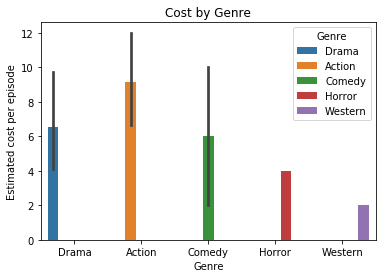

In [105]:
#sns.lmplot(x=total_cost_by_genre.keys(),y=total_cost_by_genre.values(),data=total_cost_by_genre,height=9,aspect=10/7,
#          fir_reg=True,legends=True)
sns.barplot(x='Genre', y='Estimated cost per episode',
           hue='Genre', data=df_table)
plt.title("Cost by Genre")
#>>> ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)



SyntaxError: invalid syntax (<ipython-input-35-09045fdffcd2>, line 3)

0      0
1      1
2      1
3      1
4      8
5      4
6      4
7     10
8      2
9      3
10     4
11     4
12    21
13     5
14     6
15     6
16    10
17     5
18     7
19     8
20     5
21     9
22     9
23     5
Name: Years on air, dtype: int64

,TV series,Network,Years on air,Estimated cost per episode,Genre
0,Upcoming Marvel shows,Disney+,0,25,Thriller/Suspense
1,See,Apple TV+,1,16,Drama
2,The Morning Show,Apple TV+,1,15,Drama
3,The Mandalorian,Disney+,1,15,Action
4,Game of Thrones,HBO,8,15,Action
5,The Crown,Netflix,4,13,Drama
6,Westworld,HBO,4,10,Action
7,Friends,NBC,10,10,Comedy
8,Jack Ryan,Amazon,2,8,Action
9,American Gods,Starz,3,8,Action
